In [1]:
import numpy as np
import scipy as sp
import scipy.signal as signal
import matplotlib.pyplot as plt
import IPython.display as ipd
from ipywidgets import interact

# We are going to consider today the operation of correlation and convolution. 

We find correlation and the similarity between two signals.
Let's first do a demo to get an idea about how correlation works.

In [8]:
def correlationDemo(shift):
    xs = [0,0,0,0,0,0,1,2,3,0,0,0,0,0,0]
    plt.figure()
    plt.plot(xs)
    plt.plot(np.roll(xs,shift))
    plt.show()
    print np.correlate(xs,np.roll(xs,shift))[0]
interact(correlationDemo, shift=(-6,6));

interactive(children=(IntSlider(value=0, description=u'shift', max=6, min=-6), Output()), _dom_classes=('widget-interact',))

So when the two signals are most similar we return the highest number, awesome :D
We are going to represent correlation using the following equation
$$\text{correlation} = \sum_{i=-\infty}^{\infty}x[i]y[i]$$

Now, often times in signal processing we don't just want one number for the correlation of two signals, we want a list of numbers that represents how correlated two signals are as we shift one relative to the other.
We call this method of correlation cross-correlation and will give it the notion $$CC[n]$$. Note that $$CC[0]$$ just represents the correlation of two signals.
Now, implement the cross correlation of two signals in the below function. Use zero-padding (assume values that you don't know are zero).

In [9]:
def crossCorrelation(signal1,signal2):
    pass

So, correlation is kind of interesting, but what is more interesting is how it relates to system responses.
First, let's look at an interesting thing:

A delta input gives an impulse response. Any discrete signal is the sum of deltas:
$$ x[n] = \sum_{i=-\infty}^{\infty} x[i] \delta[n-i]$$
We will now let the impulse response of the system be $$h[n]$$
And now the key: out input can be broken into a linear sum of shifted deltas. So, we can consider the individual deltas and find their impulse response and then sum those. 
Let us look at an example with input $$[1,3,-1]$$ and system $$y[n] = x[n] + 2 x[n-1]$$.

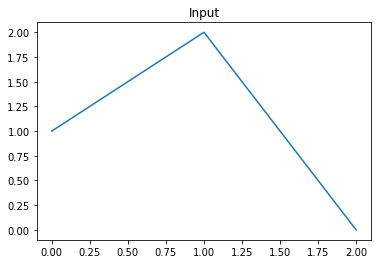

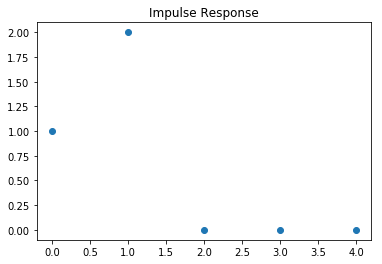

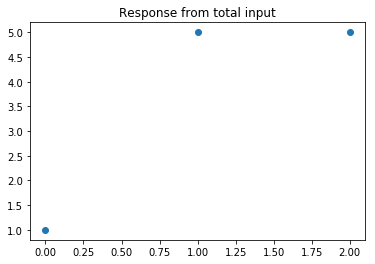

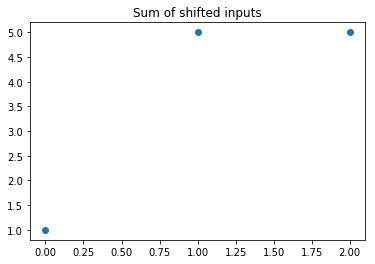

In [99]:
def correlationDemo():
    inputx = [1,3,-1]
    xs = [1,2,0]
    ys = [1,0,0]
    sys = signal.TransferFunction(xs, ys,dt=1.0)
    responsetime , response = signal.dlsim(sys,inputx)
    impulsetime, impulserespon = signal.dimpulse(sys)
    plt.figure()
    plt.plot(xs)
    plt.title("Input")
    plt.show()
    plt.figure()
    plt.plot(impulsetime[0:5],impulserespon[0][0:5],'o')
    plt.title("Impulse Response")
    plt.show()
    plt.figure()
    plt.title("Response from total input")
    plt.plot(responsetime,response,'o')
    plt.show()
    plt.figure()
    plt.title("Sum of shifted inputs")
    impulserespon = np.reshape(impulserespon, len(impulserespon[0]))
    plt.plot(np.convolve(inputx,impulserespon)[0:len(responsetime)],'o')
    plt.show()
    
correlationDemo()

OH INTERESTING :D :D!
So the output of a system is just some shifted and linearly scaled version of the impulse response! (NOTE! This is only true if LTI).
We shall formalize this by writing the equation for what is going on here:
$$ y[n] = \sum_{k=\infty}^{\infty} h[n]x[n-k]$$.
Note! The right side of the equation looks A LOT like cross-correlation. However, there is a pesky negative sign in there. In partular this is doing the cross-correlation of one signal with the x-axis flipped version of the other. We are going to call this operator convolution. Code up a version of convolution here:

Here is another diagram that will assist you in understanding :)
![convolution part 1](Photos/conv1.png)
![convolution part 2](Photos/conv2.png)
![convolution part 3](Photos/conv3.png)
![convolution part 4](Photos/conv4.png)
![convolution part 5](Photos/conv5.png)

In [93]:
def convolution(signal1,signal2):
    pass
    
testConvolution()

We are going to start experimenting with different formats that we can represent our signals in. The format that we will tackle now will be the Fourier basis.
Consider the cross-correlation of a sine wave with itself:

In [124]:
def sinusoid_dot_proudct(k1=2, k2=3) :
    N = 100
    x1 = make_cosine(1, k1, 0, N)
    x2 = make_cosine(1, k2, 0, N)
    x1x2 = x1 * x2
    dp = np.sum(x1x2)
    plt.figure()
    plt.subplot(2,1,1)
    plt.plot(x1)
    plt.plot(x2)
    plt.subplot(2,1,2)
    plt.plot(x1x2, 'r')
    plt.ylim(-1,1)
    plt.ylabel('$x_1 \cdot x_2$')
    plt.text(70, 0.7, '< x1 , x2 > = %.2f' % dp, size=15)
    plt.show()
interact(sinusoid_dot_proudct,k1=(1, 10), k2 = (1,10));

interactive(children=(IntSlider(value=2, description=u'k1', max=10, min=1), IntSlider(value=3, description=u'k2', max=10, min=1), Output()), _dom_classes=('widget-interact',))

COOl!
So sinewavess of the same frequency correlate to a non-zero value, but sinewaves of different frequencies don't have that property.
I am going to be rigorous and prove that in continuous time right now:
$$ \int_{-\pi}^{\pi} \sin(k_{1}x)\sin(k_{2}x) dx = \frac{1}{2} \int_{-\pi}^{\pi} \cos((k_{1}-k_{2})x)-\cos((k_{1}+k_{2})x) dx = \frac{1}{2} \frac{\sin((k_{1}-k_{2})x)}{k_{1}-k_{2}} \Bigg |_{\pi}^{\pi} - \frac{1}{2} \frac{\sin((k_{1}+k_{2})x)}{k_{1}+k_{2}} \Bigg |_{\pi}^{\pi} = 0 \text{ if } k_{1} \neq k_{2}$$

Huh! So if we convolve (read as correlate) a sine wave with another sine wave we get a value telling us if they match in frequency. So we can now build a frequency detector :D
Code one up below! Make use of make_cosine.
Your output should look like this:
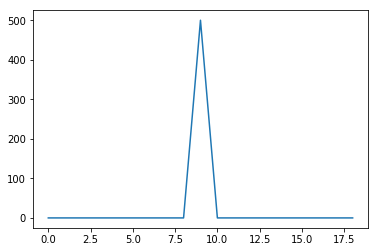

In [131]:
def frequencyDetector(signal1,freqrangemin,freqrangemax):
    pass
    
cos = make_cosine(a=1.0,k=10,N=1000,ph=0)
frequencyDetector(cos,1,20)

Cool! A frequency detector. Now, how would one do this in continuous time? In continuous time we are going to preresent a generic sinusoid using a complex exponential $$\cos(x) + j \sin(x) = e^{j x}$$. We will discuss later why we have a real and imaginary part.
So, in continuous time our frequency detector is going to look like this:
$$ X(\omega) = \int_{-\infty}^{\infty}x(t)e^{-j \omega t} dt$$
So, with this in mind can you create a formula that does this same operation with discrete signals? Do that here:
$$ \text{ PUT DISCRETE FREQUENCY DETECTOR HERE } $$.

The tool you created above is actually what is called the "Fourier Transform" which just takes some time domain signal and shows us its frequency content.
Why don't we have a look at the fourier transform of some very common signals :D :D 

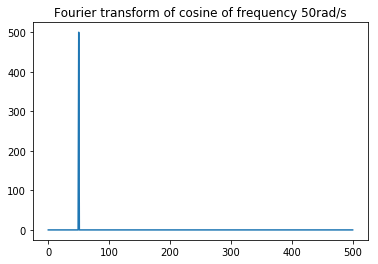

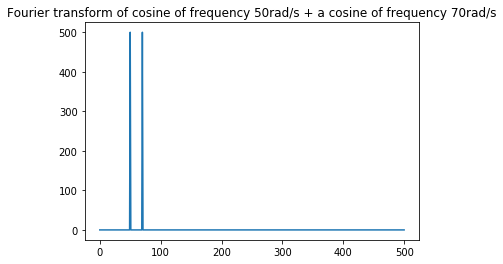

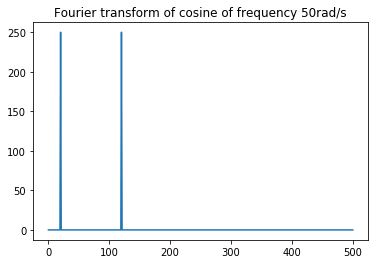

In [136]:
cosed = make_cosine(a=1.0,k=50,N=1000,ph=0)
plt.figure()
plt.plot(np.fft.rfft(cosed))
plt.title("Fourier transform of cosine of frequency 50rad/s")
plt.show()

cosed2 = make_cosine(a=1.0,k=70,N=1000,ph=0)
plt.figure()
plt.plot(np.fft.rfft(cosed+cosed2))
plt.title("Fourier transform of cosine of frequency 50rad/s + a cosine of frequency 70rad/s")
plt.show()

plt.figure()
plt.plot(np.fft.rfft(cosed*cosed2))
plt.title("Fourier transform of cosine of frequency 50rad/s times a cosine of frequency 70rad/s")
plt.show()


OHHHHH, that last picture is REALLY REALLY interesting. When we multiply the cosines together it seems to make two frequency spikes of 20rad/s and 120rad/s respectively. Why does this occur? Think about trig :D
$$\text{Write why this occurs here}$$.

We are going to think of applications of this weird phenomena.
For example, suppose we have an audio signal and we want to shift it up to a different center frequency, how can we do that? I have a toy example below:

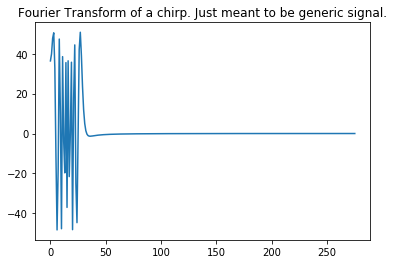

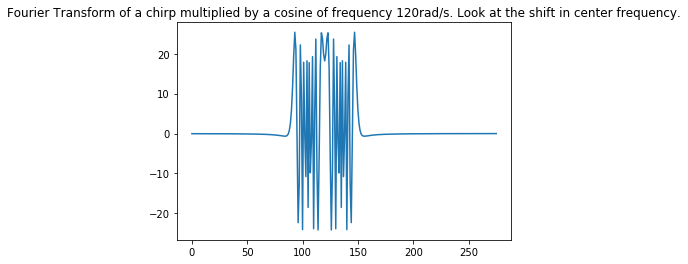

In [176]:
#starttime = 
chirp = signal.chirp(np.linspace(0,10,550), f0=0, f1=3, t1=10, method='linear')
plt.figure()
plt.plot(np.fft.rfft(chirp))
plt.title("Fourier Transform of a chirp. Just meant to be generic signal.")
plt.show()

cosmod = make_cosine(a=1.0,k=120,N=len(chirp),ph=0)
plt.figure()
plt.plot(np.fft.rfft(chirp*cosmod))
plt.title("Fourier Transform of a chirp multiplied by a cosine of frequency 120rad/s. Look at the shift in center frequency.")
plt.show()

We call this process of shifting content from one frequency range to another heterodyning.
It is recommended you read this wikipedia page: https://en.wikipedia.org/wiki/Heterodyne
What is a HUGE application of this theory? How is used everyday?
$$\text{ HUGE application of the heterodyne principle} $$

Suppose I am given a heterodyned signal (the second signal from above). How do I recover the original received signal?
$$\text{ Method of recovery}$$

DO NOT EDIT BELOW THIS LINE!!!!
# --------------------------
DO NOT EDIT BELOW THAT LINE!!!!

In [116]:
def testConvolution():
    #test1 delta with a delta
    signal1 = [1]
    signal2 = [1]
    if(convolution(signal1,signal2)==None):
        pass
    elif(convolution(signal1,signal2)[0]==1):
        print("Test 1 Passed")
    else:
        print("Test 1 Failed")
    #delta with complicated signal
    signal1 = [1,2]
    signal2 = [1]
    if(convolution(signal1,signal2)==None):
        pass
    elif(convolution(signal1,signal2)[0]==1 and convolution(signal1,signal2)[1]==2):
        print("Test 2 Passed")
    else:
        print("Test 2 Failed")
    #two complicated signals together
    signal1 = [1,2,3]
    signal2 = [3,4]
    convolved = np.convolve(signal1,signal2)
    tooCompare = convolution(signal1,signal2)
    if(tooCompare==None):
        pass
    elif(convolved[0:4]==tooCompare[0:4]):
        print("Test 3 Passed")
    else:
        print("Test 3 Failed")

In [117]:
# helper functions:
def make_cosine(a, k, ph, N) :
    n = np.arange(N)
    return a * np.cos( 2 * np.pi * k / N * n + ph)